<a href="https://colab.research.google.com/github/Amitkumardas123/Capstone-project----Bike-Sharing-Demand-Prediction/blob/main/Bike_sharing_Prediction_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -   Bike Sharing Demand Prediction



##### **Project Type**    - Capstone Project - Regression
##### **Contribution**    - Individual

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/Amitkumardas123/Capstone-project----Bike-Sharing-Demand-Prediction

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
from datetime import datetime
from datetime import date
import calendar

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')



### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset

# Specify the encoding when reading the CSV file
Data = pd.read_csv('/content/drive/MyDrive/Full Stack Data Science/Introduction to Machine Learning/ML Appetizer/Capstone Project - Supervised ML - Regression/SeoulBikeData.csv', encoding='ISO-8859-1')



### Dataset First View

In [4]:
# Dataset First Look
Data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
Data.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
Data.shape

(8760, 14)

### Dataset Information

In [7]:
# Dataset Info
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [8]:
Data.describe(include = 'all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
dup = len(Data[Data.duplicated()])
print(f'The number of duplicate value in the dataset is {dup}')

The number of duplicate value in the dataset is 0


#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
Data.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

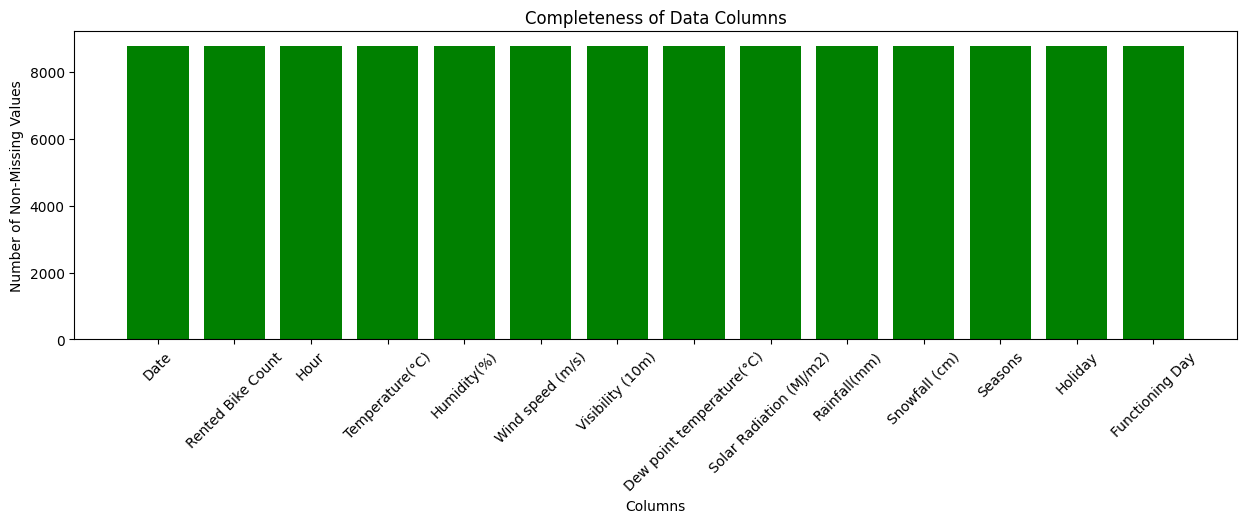

In [11]:
# Visualizing the missing values
plt.figure(figsize=(15, 4))
plt.bar(Data.columns, Data.notnull().sum(), color='green')
plt.title('Completeness of Data Columns')
plt.xlabel('Columns')
plt.ylabel('Number of Non-Missing Values')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


### What did you know about your dataset?

### We are happy to know that there is no missing value and duplicate value present in my dataset.This is a good dataset for modeling.

## ***2. Understanding Your Variables***

In [12]:
# Dataset Columns
Columns = Data.columns
Columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [13]:
# Dataset Describe
Data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,8760,365,01/12/2017,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rented Bike Count,8760.0,NaN,NaN,NaN,704.602055,644.997468,0.0,191.0,504.5,1065.25,3556.0
Hour,8760.0,NaN,NaN,NaN,11.5,6.922582,0.0,5.75,11.5,17.25,23.0
Temperature(°C),8760.0,NaN,NaN,NaN,12.882922,11.944825,-17.8,3.5,13.7,22.5,39.4
Humidity(%),8760.0,NaN,NaN,NaN,58.226256,20.362413,0.0,42.0,57.0,74.0,98.0
Wind speed (m/s),8760.0,NaN,NaN,NaN,1.724909,1.0363,0.0,0.9,1.5,2.3,7.4
Visibility (10m),8760.0,NaN,NaN,NaN,1436.825799,608.298712,27.0,940.0,1698.0,2000.0,2000.0
Dew point temperature(°C),8760.0,NaN,NaN,NaN,4.073813,13.060369,-30.6,-4.7,5.1,14.8,27.2
Solar Radiation (MJ/m2),8760.0,NaN,NaN,NaN,0.569111,0.868746,0.0,0.0,0.01,0.93,3.52
Rainfall(mm),8760.0,NaN,NaN,NaN,0.148687,1.128193,0.0,0.0,0.0,0.0,35.0


# **Variables Description**

### The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.

# Feature Information :
      Date : year-month-day

      Rented_Bike_Count - Count of bikes rented at each hour

      Hour - Hour of he day

      Temperature-Temperature in Celsius

      Humidity - %

      Windspeed - m/s

      Visibility - 10m

      Dew point temperature - Celsius

      Solar radiation - MJ/m2

      Rainfall - mm

      Snowfall - cm

      Seasons - Winter, Spring, Summer, Autumn

      Holiday - Holiday/No holiday
      
      Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.
numerical_feature = Data.describe().columns
unique_value = {}

for col in Columns:
  unique = Data[col].nunique()
  unique_value[col] = unique

print(f'Number of unique value for each variable {unique_value}')

Number of unique value for each variable {'Date': 365, 'Rented Bike Count': 2166, 'Hour': 24, 'Temperature(°C)': 546, 'Humidity(%)': 90, 'Wind speed (m/s)': 65, 'Visibility (10m)': 1789, 'Dew point temperature(°C)': 556, 'Solar Radiation (MJ/m2)': 345, 'Rainfall(mm)': 61, 'Snowfall (cm)': 51, 'Seasons': 4, 'Holiday': 2, 'Functioning Day': 2}


In [15]:
# Let see the unique value of caltegorical features
categorical_feature = Data.describe(include = ['object','category']).columns
C_un_values = {}
for col in categorical_feature[1:]:
  unique = Data[col].unique()
  C_un_values[col] = unique

print(f'Unique values in each categorical_feature are {C_un_values}')

Unique values in each categorical_feature are {'Seasons': array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object), 'Holiday': array(['No Holiday', 'Holiday'], dtype=object), 'Functioning Day': array(['Yes', 'No'], dtype=object)}


## 3. ***Data Wrangling***

### Data Wrangling Code

In [16]:
# Write your code to make your dataset analysis ready.
#converting few features names for Rediability
Data.rename({"Temperature(°C)": "Temperature",
               "Functioning Day":"Functioning_Day",
                "Humidity(%)": "Humidity",
                "Wind speed (m/s)": "Wind_speed",
                "Visibility (10m)": "Visibility",
                "Dew point temperature(°C)": "Dew_point_temperature",
                "Solar Radiation (MJ/m2)": "Solar_Radiation",
                "Snowfall (cm)": "Snowfall",
                "Rainfall(mm)": "Rainfall",
                "Rented Bike Count": "Rented_Bike_Count"},
                axis = "columns", inplace = True)

In [17]:
Data.head()

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [18]:
# check datatype
print(Data['Date'].dtype)

#creating copy to keep oringal data safe
df = Data.copy()

# Change date data type to datetime obj
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)

object


In [19]:
#Extracting month from date column
df['Month'] = df['Date'].dt.strftime('%b')
#Extracting day name from date
df['Day'] = df['Date'].dt.strftime('%a')

#Extracting year
df['Year'] = df['Date'].dt.year

df.head()

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Month,Day,Year
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Jan,Thu,2017
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Jan,Thu,2017
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Jan,Thu,2017
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Jan,Thu,2017
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Jan,Thu,2017


### What all manipulations have you done and insights you found?

*   # We may not need to perform so much data cleaning because the ranges of values in the numerical columns appear fair as well. However,columns like Wind speed , Dew_point_temperature, Solar Radiation, Rainfall and Snowfall appears to be skewed as their median (50 percentile) is much lower than the max value.
*  # And we extracting Day,month,year column from Date column for our visulization  purpose.




## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [20]:
# Chart - 1 visualization code
#visualize effect on bike_count for change in temparature,humidity,windspeed,visibilty,Dew_point_temp,solar_rad,snow_fall,Rain_fall
numerical_feature = Data.describe().columns
numerical_feature

Index(['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall'],
      dtype='object')

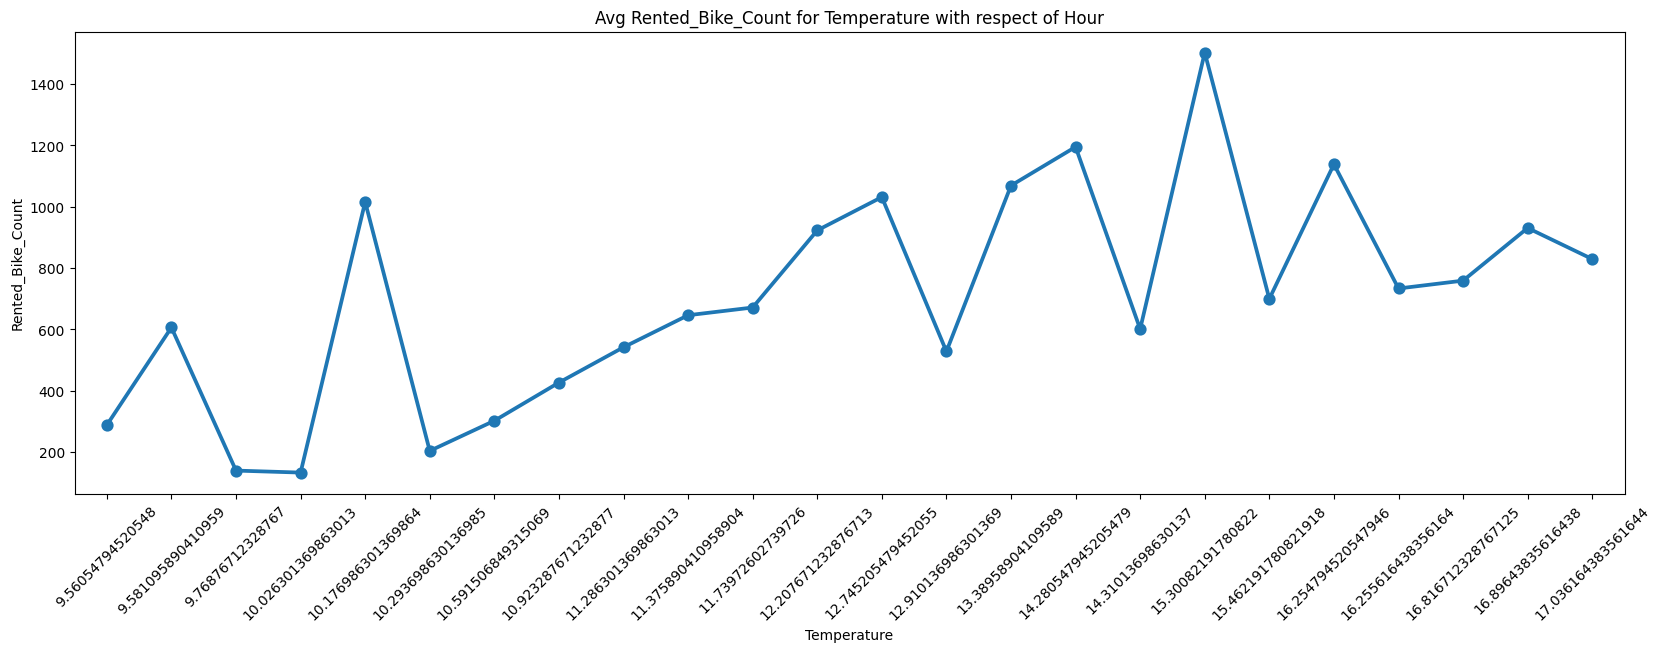

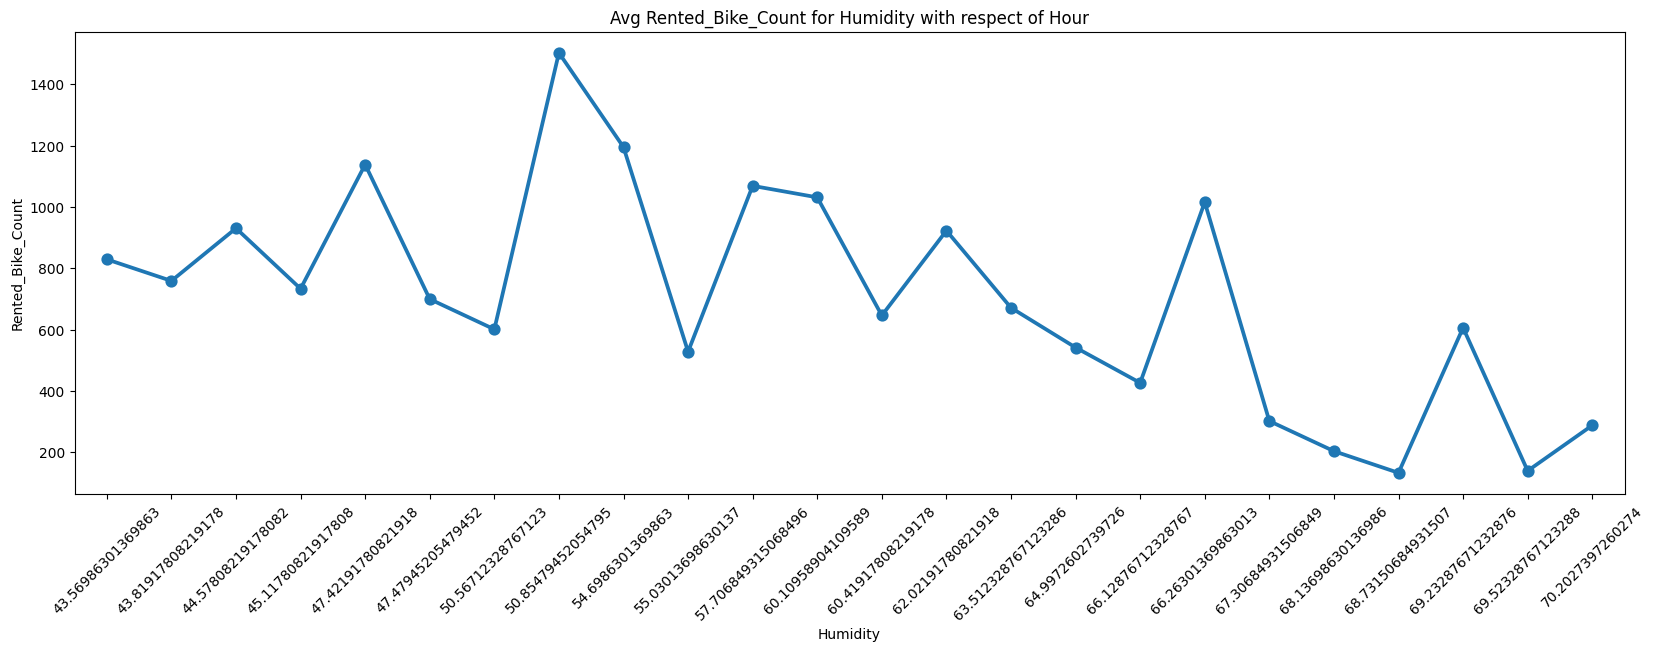

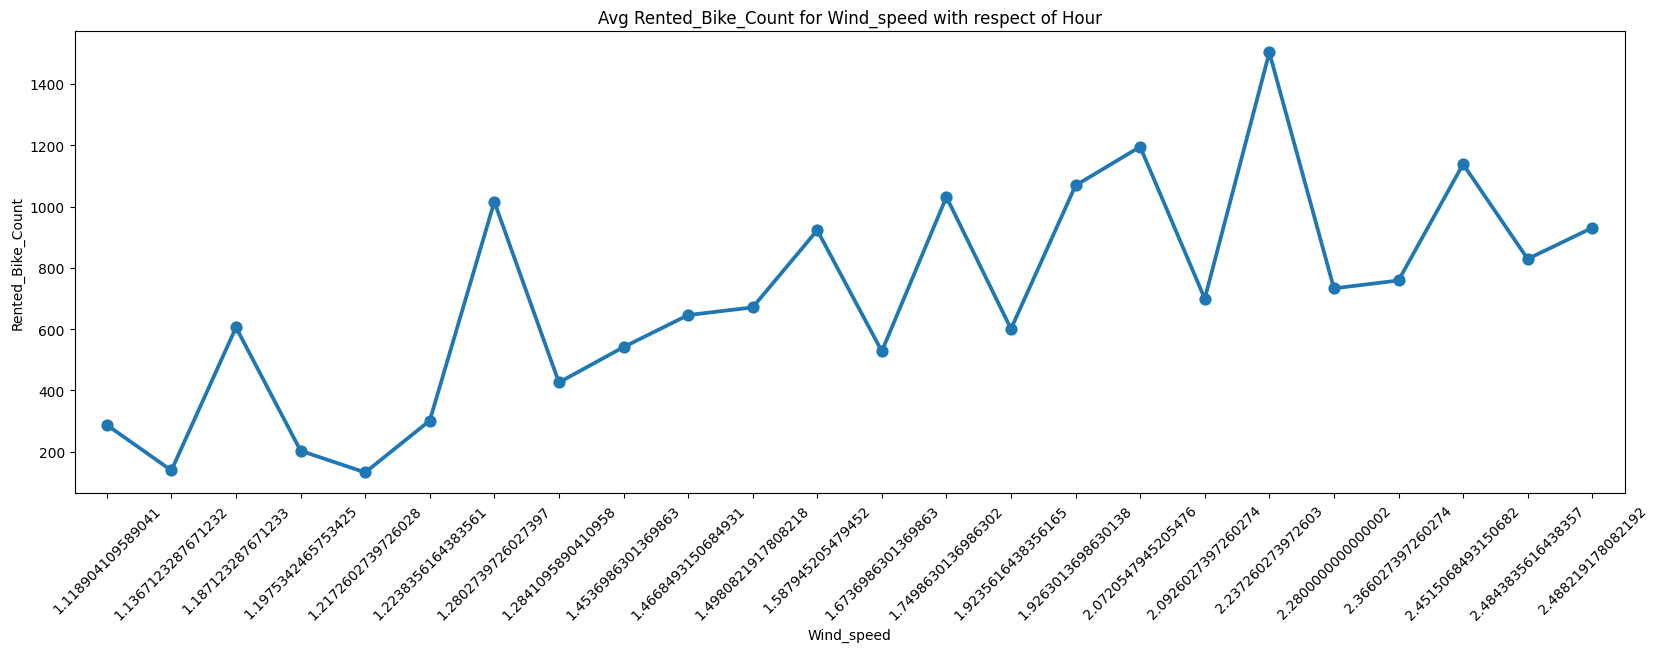

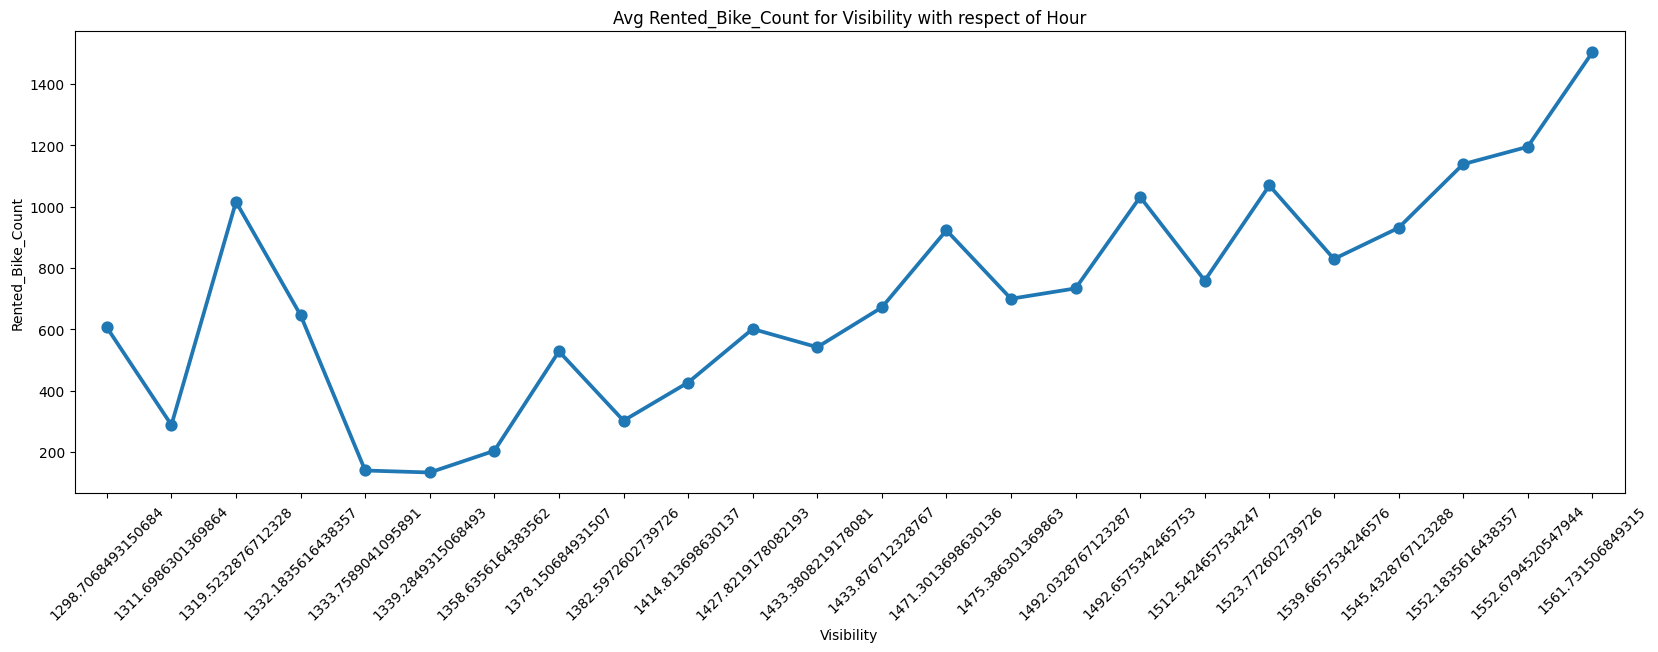

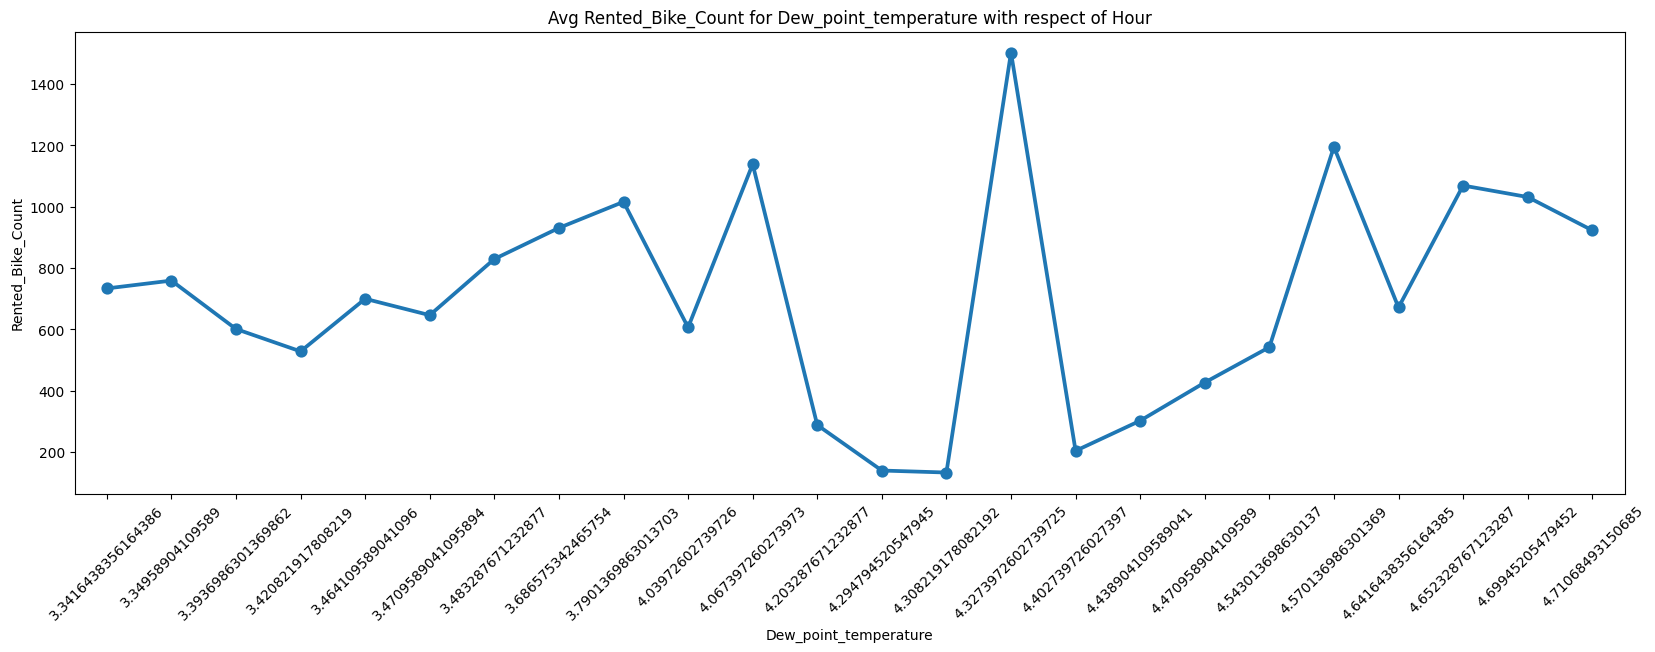

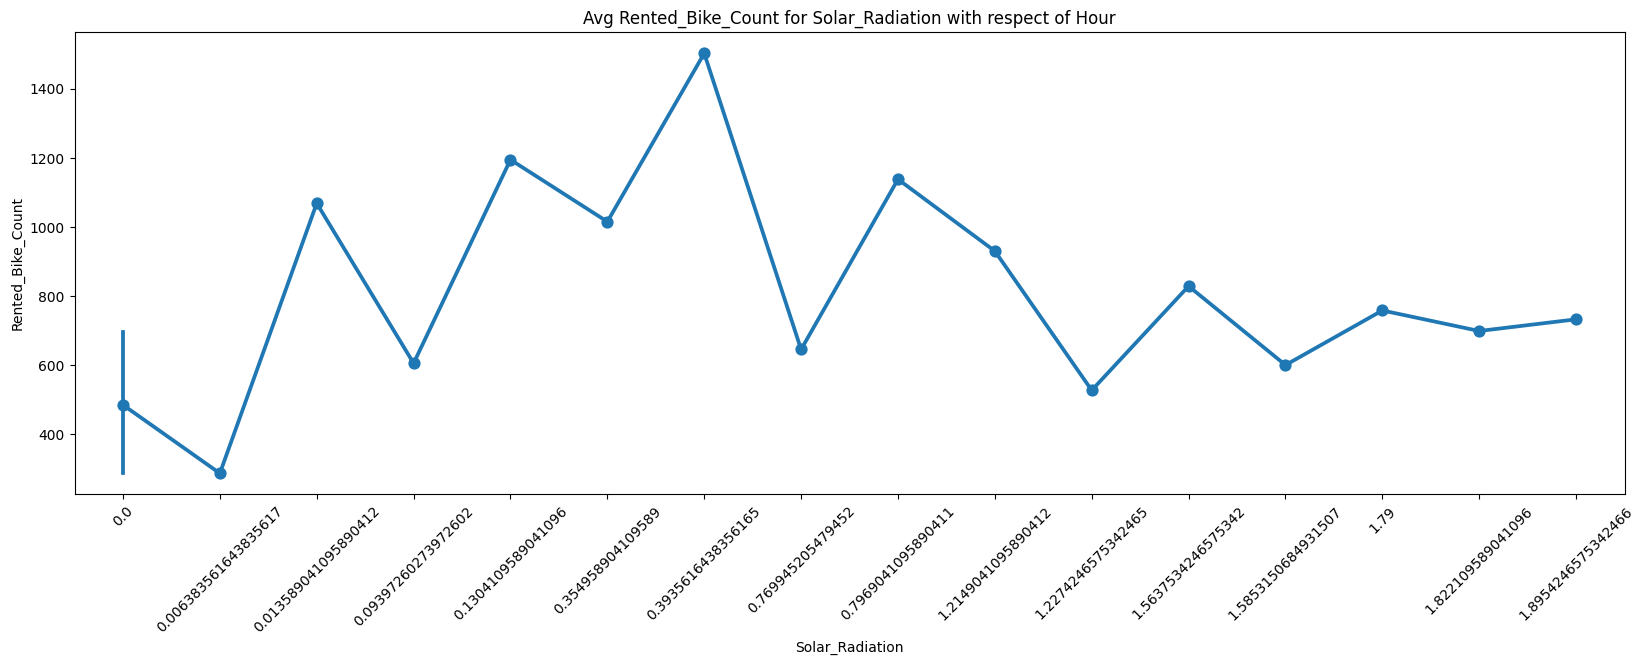

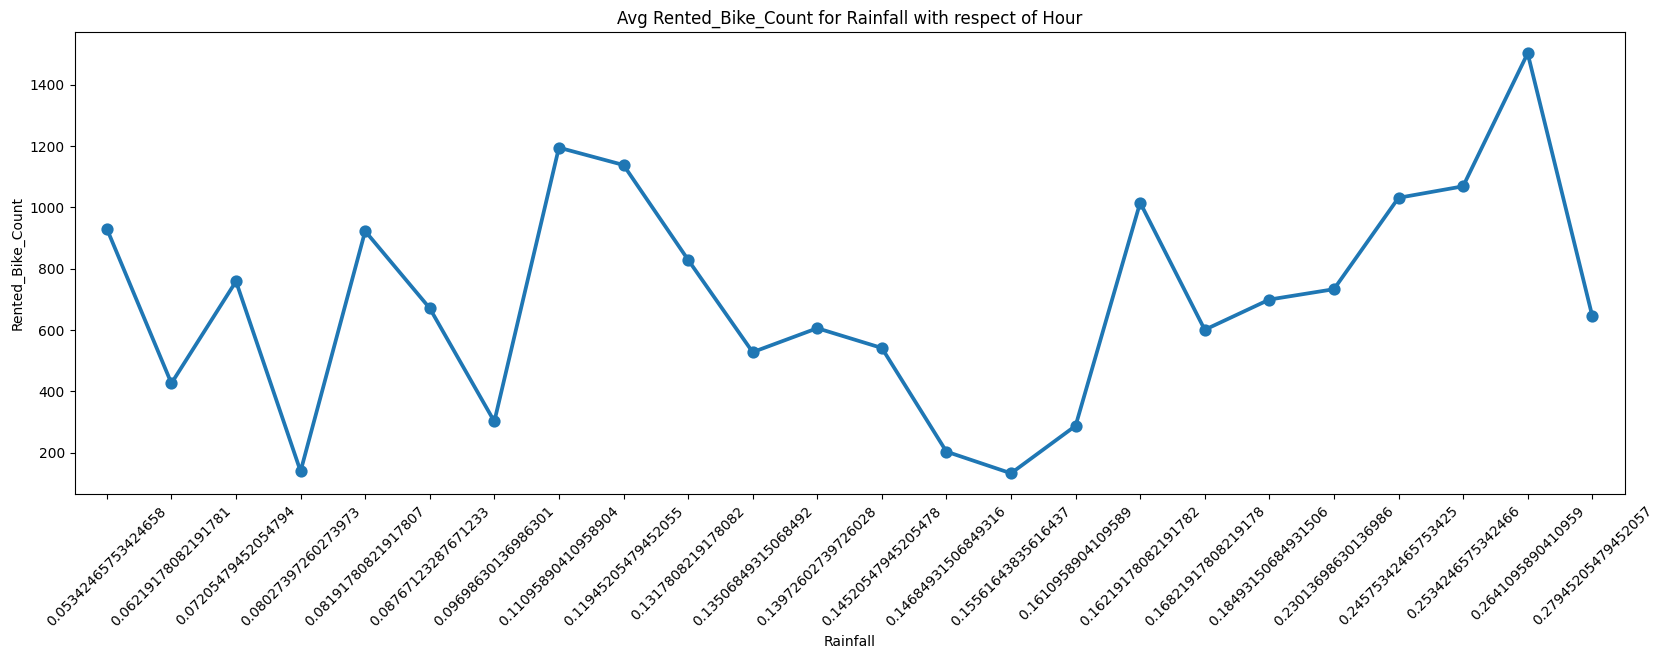

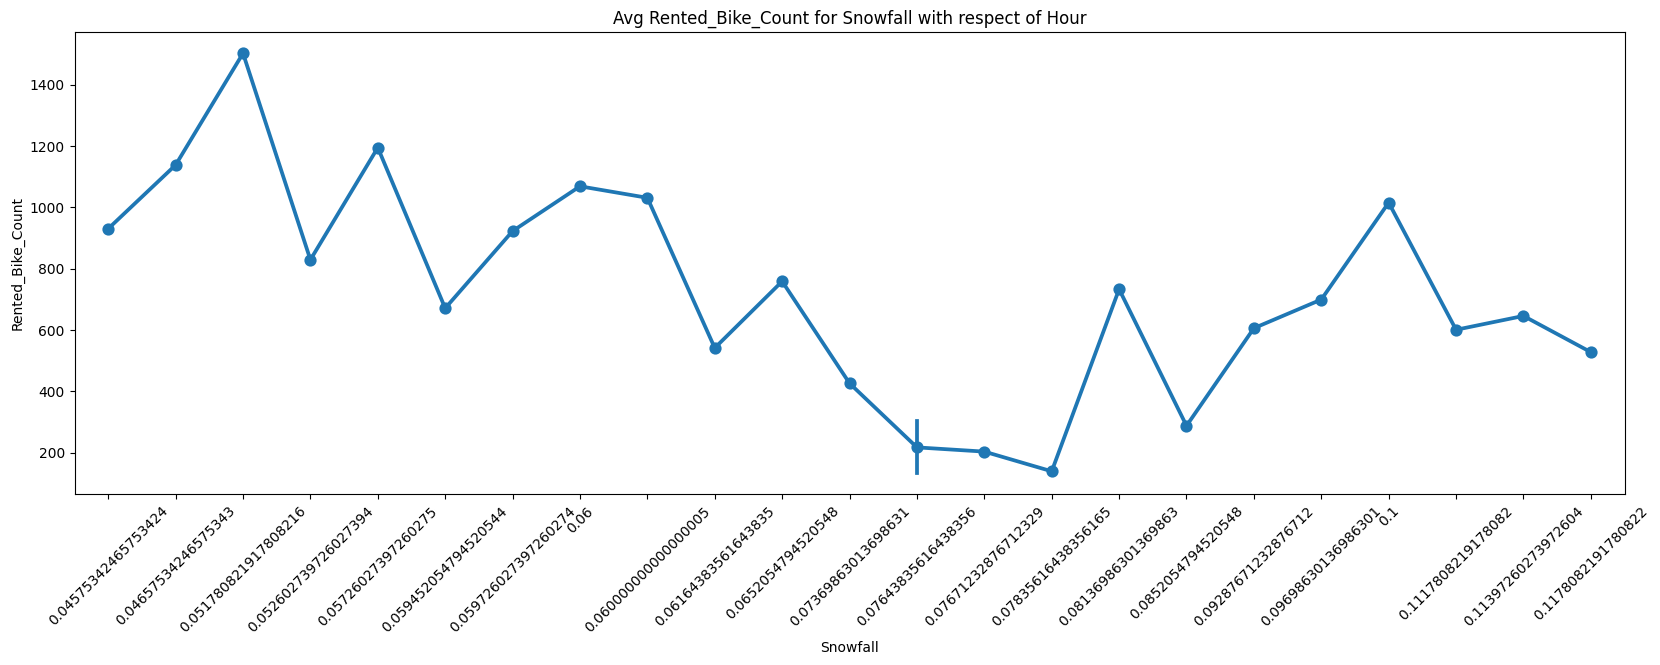

In [21]:
for col in numerical_feature[2:]:
    grp = df.groupby(['Hour'], as_index = False)[col,'Rented_Bike_Count'].mean().sort_values(col, ascending = False)
    plt.figure(figsize=(20,6))
    sns.pointplot(x=grp.loc[:,col], y=grp["Rented_Bike_Count"])
    plt.title(f"Avg Rented_Bike_Count for {col} with respect of Hour")
    plt.xticks(rotation=45)
    plt.show()

##### 1. Why did you pick the specific chart?

From this chart we can easily understand the change in bike demand for change in different different features

##### 2. What is/are the insight(s) found from the chart?



*   When temparature,humidity,wind speed,dew point temparature are modereate (means fair to go outside),more people using bike for travel.
*  when the visibilty was high bike demand also high.
*  When solar radiation,rain fall and snow fall were less bike demand is high.






#### Chart - 2

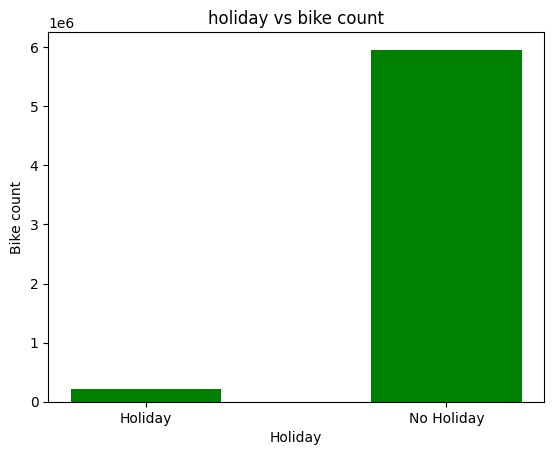

In [22]:
# Chart - 2 visualization code
# visulize the rented bike count for working day vs non working day
grp = df.groupby(['Holiday'], as_index = False)['Rented_Bike_Count'].sum()

plt.bar(grp.iloc[:,0],grp.iloc[:,1], color ='green',
        width = 0.5)
plt.xlabel("Holiday")
plt.ylabel("Bike count")
plt.title("holiday vs bike count")
plt.show()


##### 1. Why did you pick the specific chart?

Bar chart usually use to check how a particular variable varies across different type of another variable thats why i choose this bar chart.

##### 2. What is/are the insight(s) found from the chart?

From the above plot we can  see that in working day bike demand is so high as compare to non working day.

#### Chart - 3

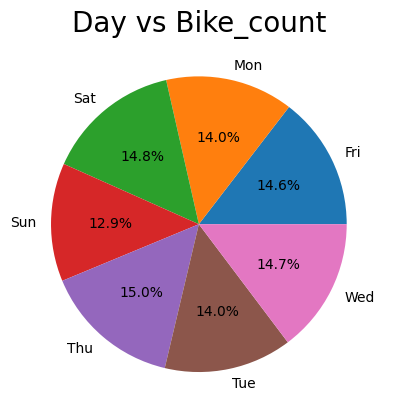

In [24]:
# Chart - 3 visualization code
# visualize the rented bike count for each day
Day = df.groupby('Day')['Rented_Bike_Count'].sum()
plt.pie(Day, labels=Day.index, autopct='%1.1f%%')

# Add a title to the chart
plt.title("Day vs Bike_count", fontsize='20')
plt.show()


##### 2. What is/are the insight(s) found from the chart?

From the above visualization we found that All the days in week except sunday,people are more use bikes

#### Chart - 4

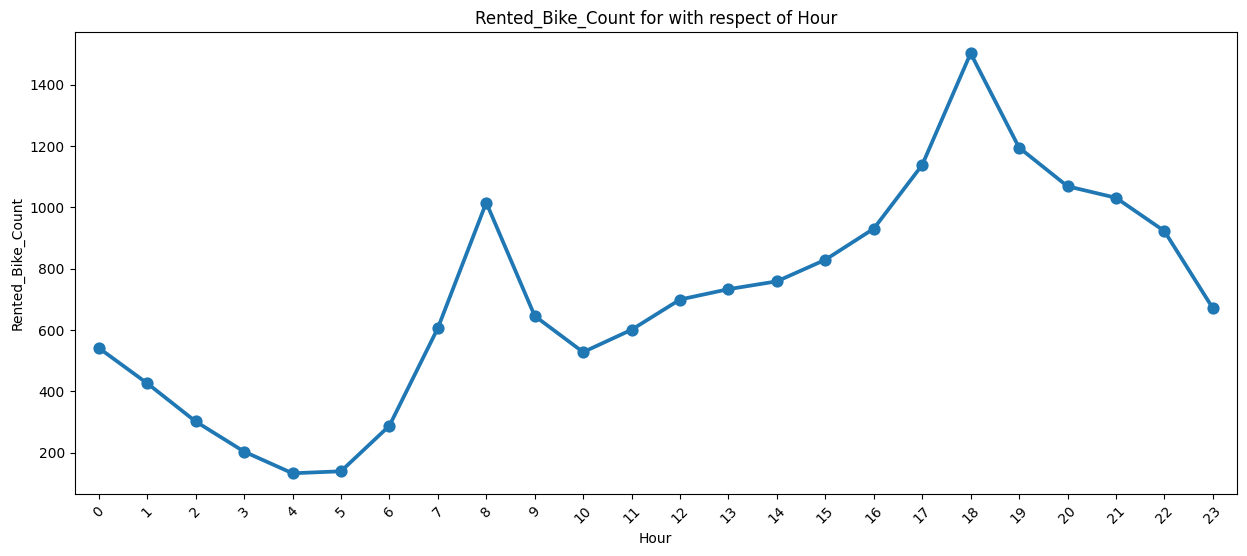

In [25]:
# Chart - 4 visualization code
#visualize  avg rented bike count for every hour in a day
grp = df.groupby(['Hour'], as_index = False)['Rented_Bike_Count'].mean().sort_values('Hour', ascending = True)
plt.figure(figsize=(15,6))
sns.pointplot(x=grp['Hour'], y=grp["Rented_Bike_Count"])
plt.title("Rented_Bike_Count for with respect of Hour")
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

Point plots can be more useful for focusing comparisons between different levels of one or more categorical variables

##### 2. What is/are the insight(s) found from the chart?



*   Demand for rented bike count is higher at 7 AM to 9 AM and 6PM to 8PM indicating a high demand during business hours.

#### Chart - 5

In [26]:
# Chart - 5 visualization code
#Visualize bike demand for holiday and non holiday
grp = df.groupby(['Hour','Holiday'], as_index = False)['Rented_Bike_Count'].mean().sort_values('Hour', ascending = True)
grp

,Hour,Holiday,Rented_Bike_Count
0,0,Holiday,466.166667
1,0,No Holiday,545.365994
2,1,Holiday,393.333333
3,1,No Holiday,427.887608
4,2,Holiday,303.888889
5,2,No Holiday,301.512968
6,3,Holiday,212.333333
7,3,No Holiday,202.864553
8,4,Holiday,128.388889
9,4,No Holiday,132.809798


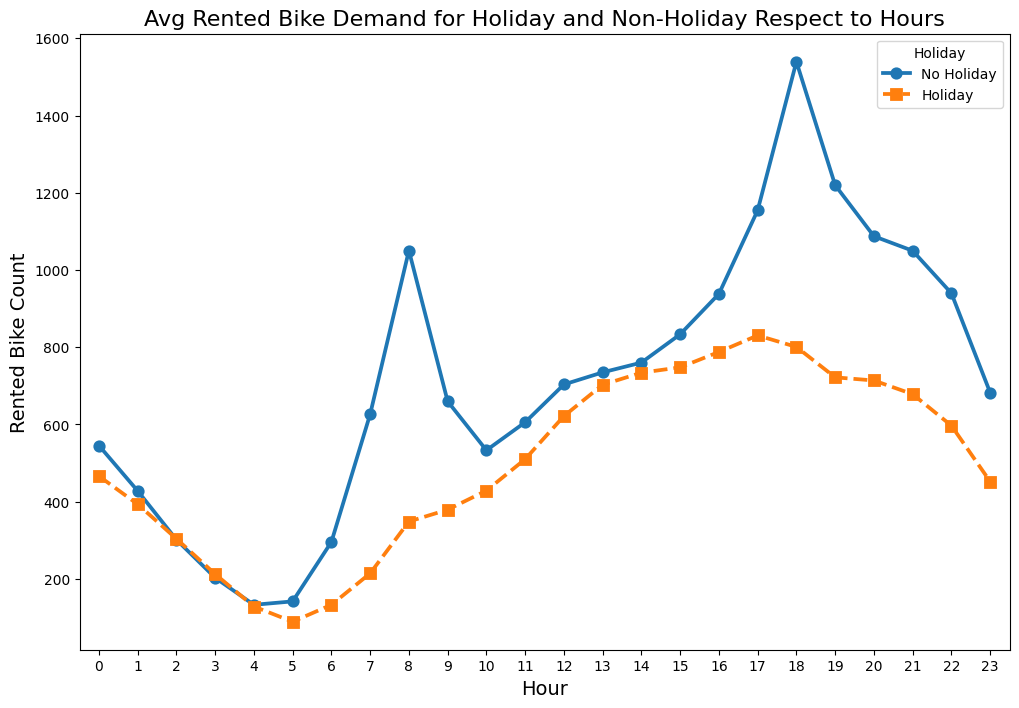

In [27]:
plt.figure(figsize=(12, 8))
sns.pointplot(x='Hour', y='Rented_Bike_Count', hue='Holiday', data=df, ci=None, markers=['o', 's'], linestyles=['-', '--'])

# Add labels and title
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Rented Bike Count', fontsize=14)
plt.title('Avg Rented Bike Demand for Holiday and Non-Holiday Respect to Hours', fontsize=16)

# Add legend
plt.legend(title='Holiday', loc='upper right')

# Show the plot
plt.show()


##### 2. What is/are the insight(s) found from the chart?

Answer Here

*   Rented Bike Count follows 2 patterns one for holiday and another for no holiday.
*   No Holiday : The first pattern is where there is a peak in the rentals at around 8 am and another at around 6 pm. These correspond to local bikers who typically go to work on a working day, Monday to Friday.

*   Holiday : Second pattern where there are more or less uniform rentals across the day with a peak at around noon time. These correspond to probable tourists who typically are casual users who rent/drop off bikes uniformly during the day and tour the city on nonworking days which typically are Saturday and Sunday





#### Chart - 6

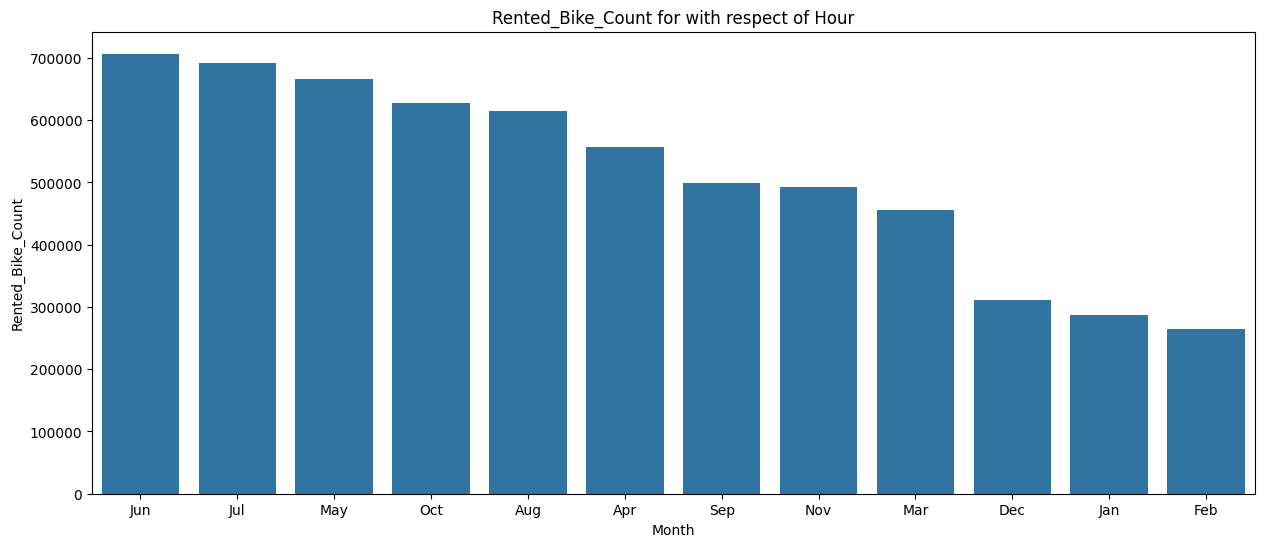

In [30]:
# Chart - 6 visualization code
# Rented bike count for each month
grp = df.groupby(['Month'], as_index = False)['Rented_Bike_Count'].sum().sort_values('Rented_Bike_Count', ascending = False)
plt.figure(figsize=(15,6))
sns.barplot(x=grp['Month'], y=grp["Rented_Bike_Count"])
plt.title("Rented_Bike_Count for with respect of Hour")
plt.show()


##### 2. What is/are the insight(s) found from the chart?

From the above observation we can see the bike demand is low in jan,feb and december.but from the month of march to nov the bike demand is increase gradualy as compare to dec,jan and feb.

#### Chart - 7

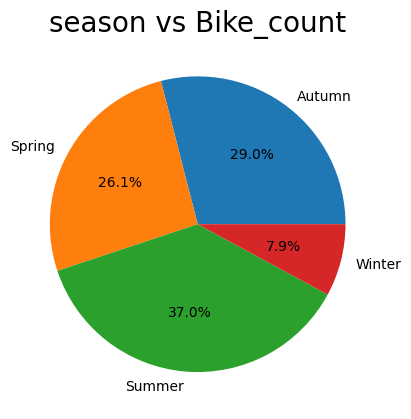

In [31]:
# Chart - 7 visualization code
# visualize the effect of season in bike demand
season = df.groupby('Seasons')['Rented_Bike_Count'].sum()
plt.pie(season, labels=season.index, autopct='%1.1f%%')

# Add a title to the chart
plt.title("season vs Bike_count", fontsize='20')
plt.show()

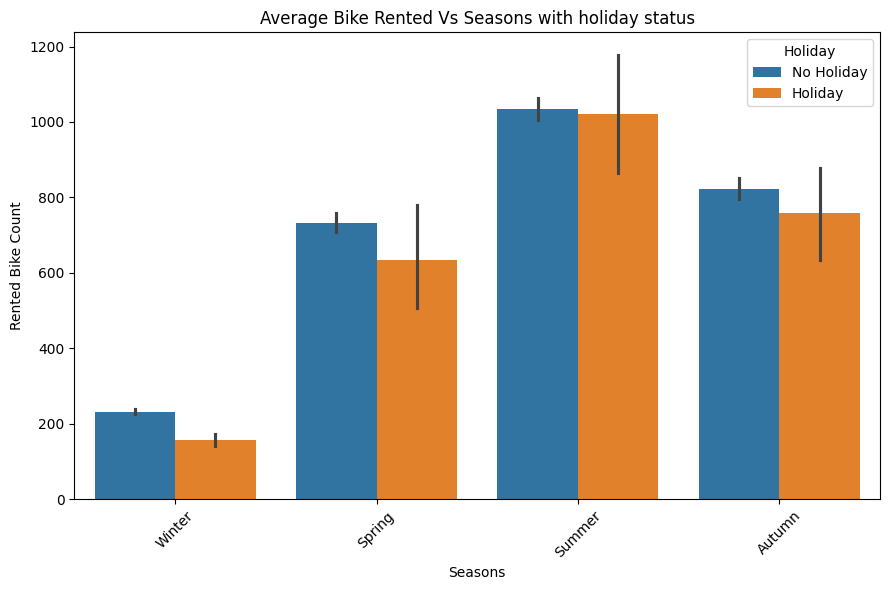

In [32]:
fig, ax = plt.subplots(figsize=(9, 6))

# Use barplot with 'hue' to differentiate 'Holiday' and 'No Holiday'
cat = sns.barplot(data=df, x='Seasons', y='Rented_Bike_Count', hue='Holiday', ax=ax)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set labels and title
cat.set(xlabel='Seasons', ylabel='Rented Bike Count', title='Average Bike Rented Vs Seasons with holiday status')

# Add legend
ax.legend(title='Holiday', loc='upper right')

plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A pie chart helps organize and show data as a percentage of a whole. True to the name, this kind of visualization uses a circle to represent the whole, and slices of that circle, or “pie”, to represent the specific categories that compose the whole.

##### 2. What is/are the insight(s) found from the chart?



*   The most preferred season for the rented_bike_count is summer and the least preferred is winter which means that people prefer to rent bikes in warm temperatures.
*   In every season  non holiday rented_bike_count has more count than on a holiday.



#### Chart - 8

In [33]:
# Chart - 8 visualization code
# visualize Bike demand in functioning and non functioning day
grp = df.groupby(['Functioning_Day','Hour'], as_index = False)['Rented_Bike_Count'].sum().sort_values(['Functioning_Day','Hour'], ascending = False)
grp

,Functioning_Day,Hour,Rented_Bike_Count
47,Yes,23,244961
46,Yes,22,336821
45,Yes,21,376479
44,Yes,20,390172
43,Yes,19,436229
42,Yes,18,548568
41,Yes,17,415556
40,Yes,16,339677
39,Yes,15,302653
38,Yes,14,276971


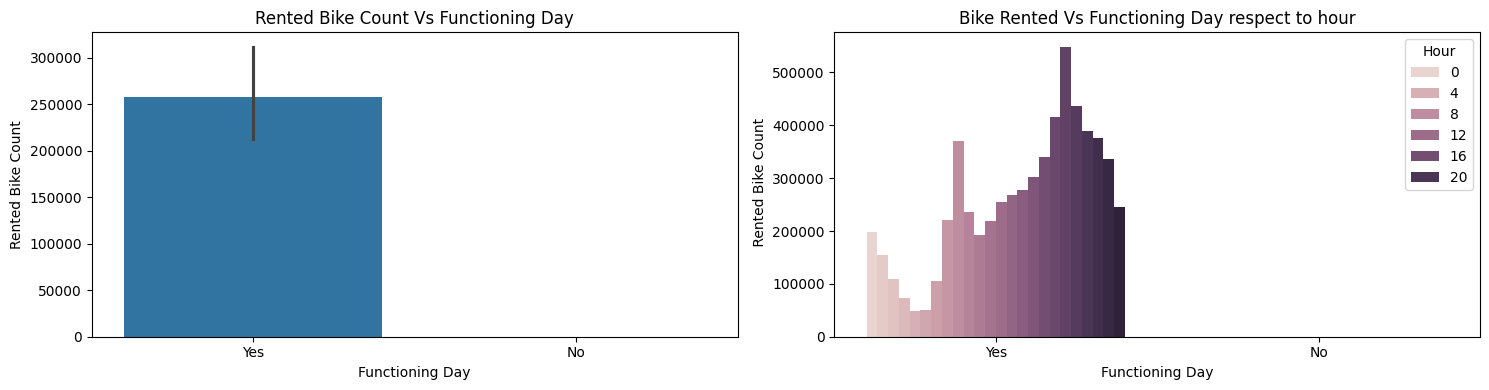

In [34]:
fig,ax = plt.subplots(1,2, figsize=(15,4))

# Rented Bike Count Vs Functioning Day
bar = sns.barplot(data=grp, x='Functioning_Day', y='Rented_Bike_Count', ax = ax[0])
bar.set(xlabel='Functioning Day', ylabel='Rented Bike Count', title='Rented Bike Count Vs Functioning Day')

# Multi-variate analysis
cat = sns.barplot(data=grp, x='Functioning_Day', y='Rented_Bike_Count', hue='Hour', ax= ax[1])
cat.set(xlabel='Functioning Day', ylabel = ' Rented Bike Count', title= 'Bike Rented Vs Functioning Day respect to hour')

plt.tight_layout()
plt.show()


##### 2. What is/are the insight(s) found from the chart?



*   Even though we have some counts of no functioning days still there is no bike rented on a no functioning day.
*   On a functioning day, the evening(6 PM to 10 Pm) session has the most rented bike count.



#### Chart - 9

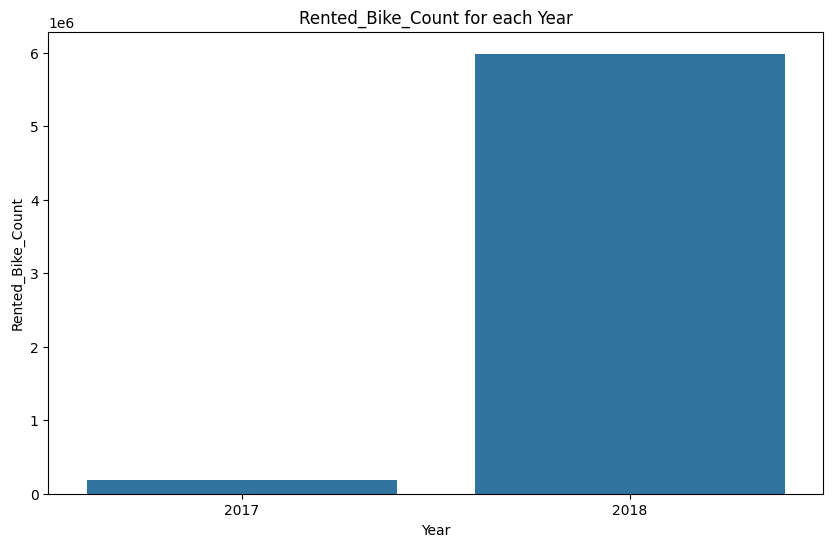

In [35]:
# Chart - 9 visualization code
#Compare ranted bike count for each year
grp = df.groupby(['Year'], as_index = False)['Rented_Bike_Count'].sum().sort_values('Year', ascending = False)
plt.figure(figsize=(10,6))
sns.barplot(x=grp['Year'], y=grp["Rented_Bike_Count"])
plt.title("Rented_Bike_Count for each Year")
plt.show()


##### 2. What is/are the insight(s) found from the chart?

The Dataset contains most of the data of 2018 and less amount of 2017 data.

#### Chart - 10

In [36]:
# Chart - 10 visualization code
numerical_features = df.describe().columns
numerical_features

Index(['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall', 'Year'],
      dtype='object')

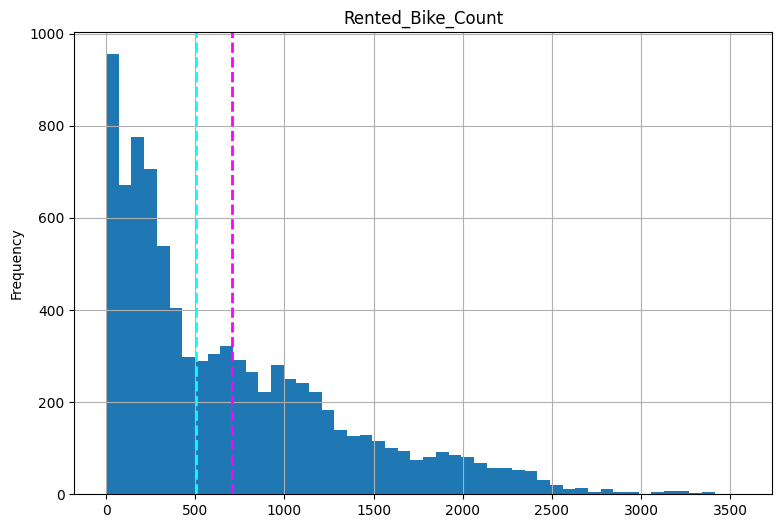

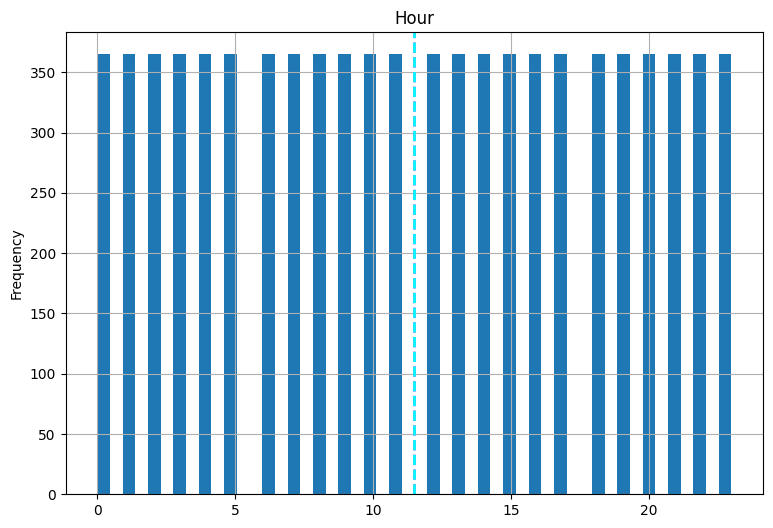

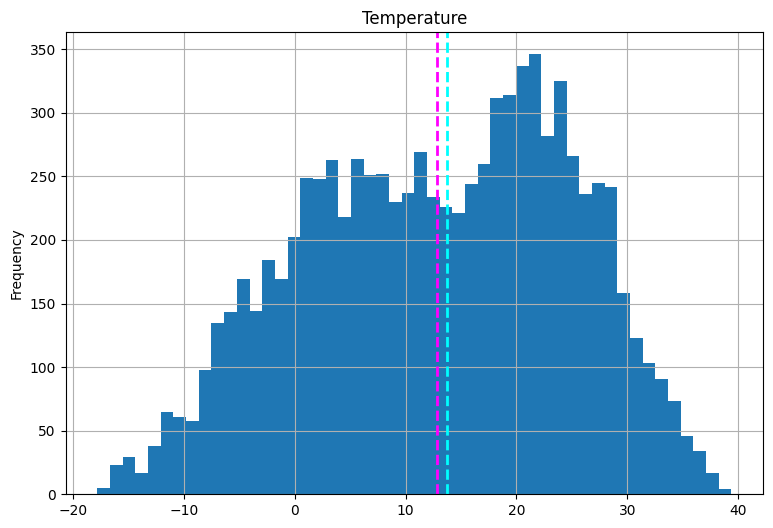

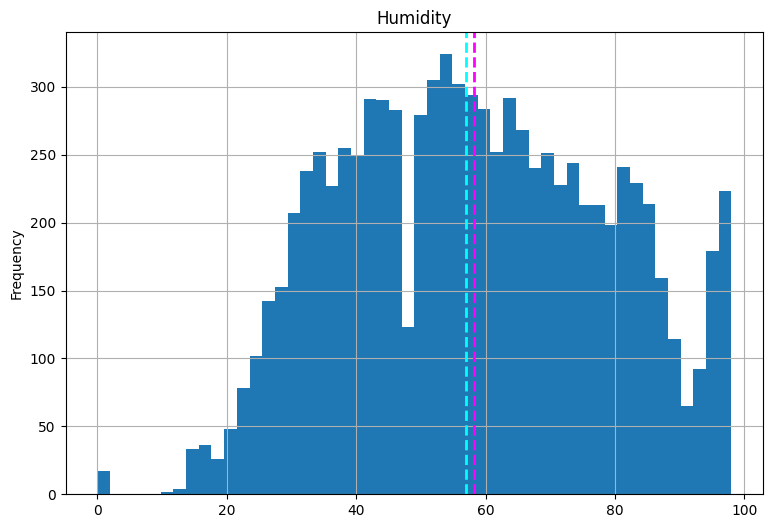

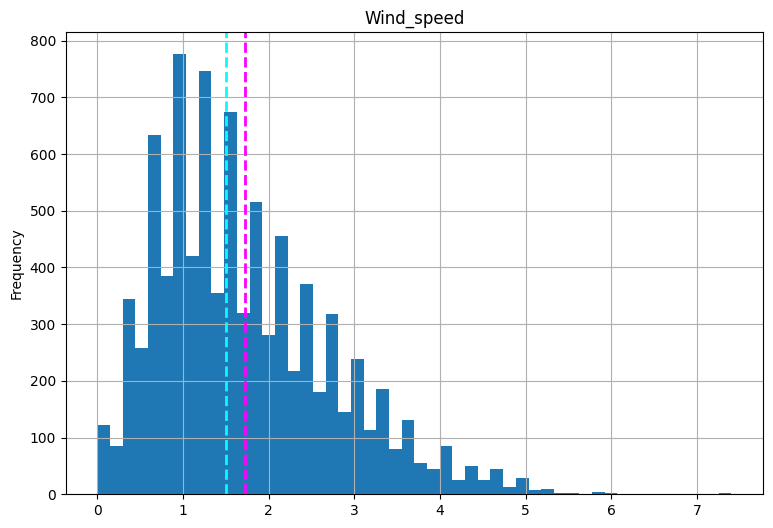

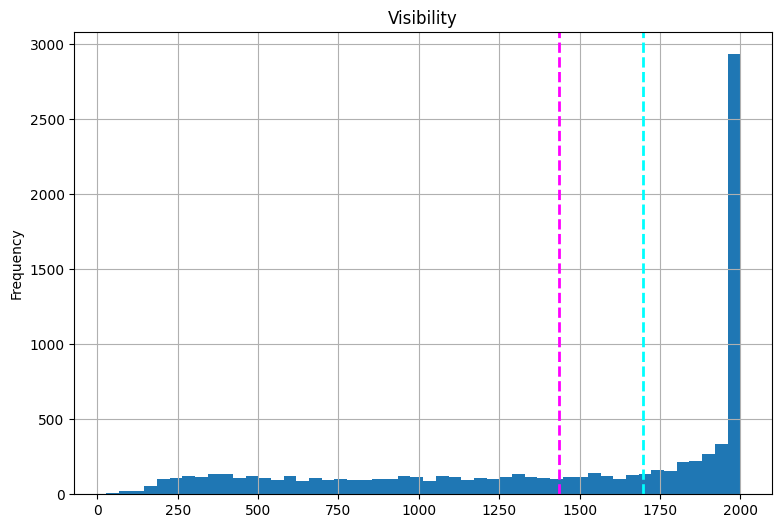

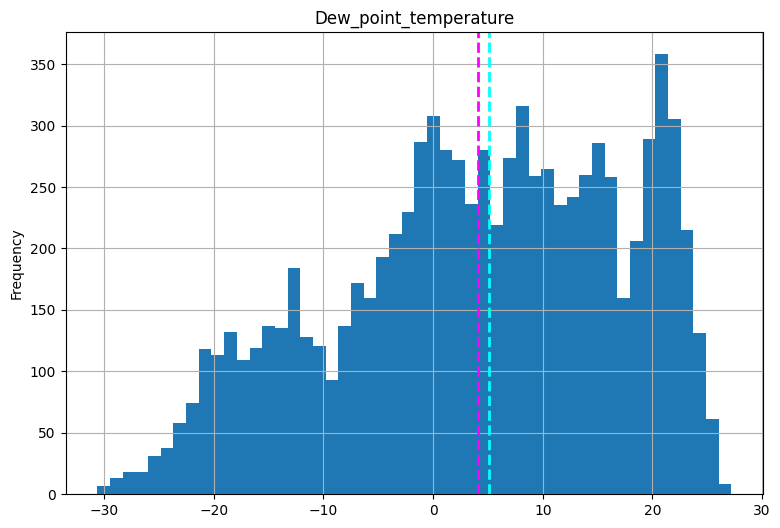

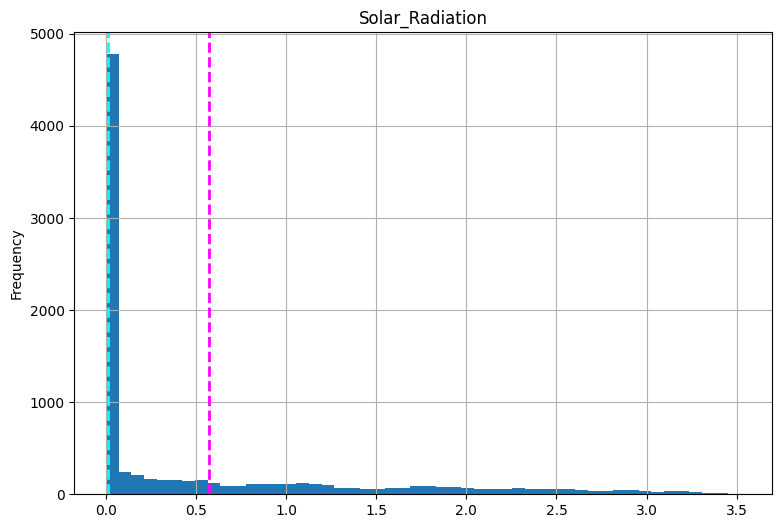

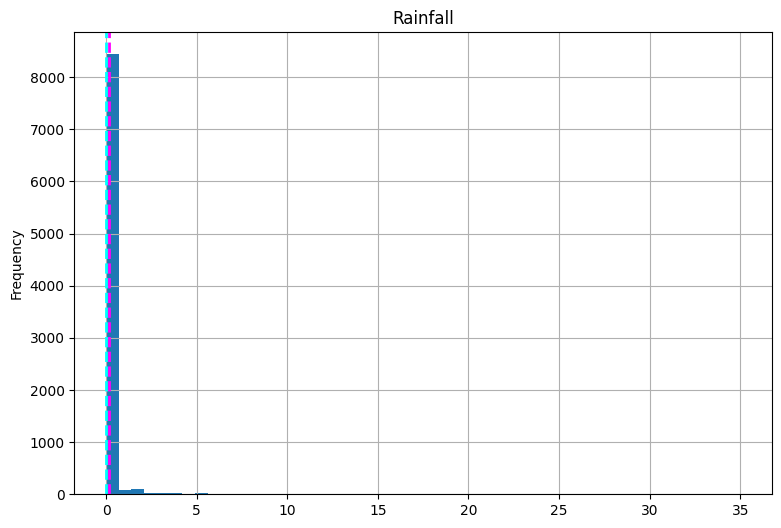

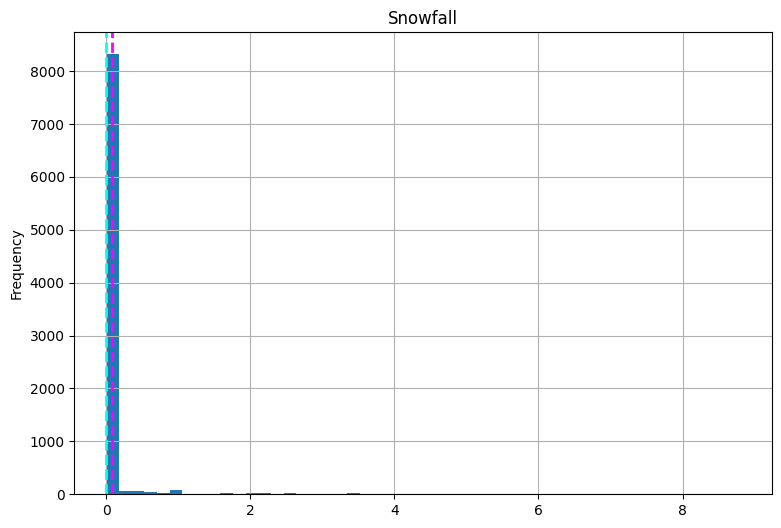

In [37]:
#plot a bar plot for each numerical feature except year
for col in numerical_features[:-1]:
  fig = plt.figure(figsize=(9,6))
  ax = fig.gca()
  feature = df[col]
  feature.hist(bins = 50,ax = ax)
  ax.axvline(feature.mean(),color ='magenta',linestyle ='--',linewidth =2)
  ax.axvline(feature.median(),color ='cyan',linestyle ='--',linewidth =2)
  ax.set_title(col)
  ax.set_ylabel('Frequency')
plt.show()

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***